In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14, 8)})

In [2]:
def scoring(clusterization, y_true, X):
    print(f'Number of clusters: {len(np.unique(y_true))} Estimated number of clusters: {len(np.unique(clusterization.labels_))}')
    print(f'Homogenity: {metrics.homogeneity_score(y_true, clusterization.labels_)}')
    print(f'Completeness: {metrics.completeness_score(y_true, clusterization.labels_)}')
    print(f'V measure: {metrics.v_measure_score(y_true, clusterization.labels_)}')
    

In [3]:
from sklearn.datasets._samples_generator import make_moons

X, y = make_moons()

<AxesSubplot:>

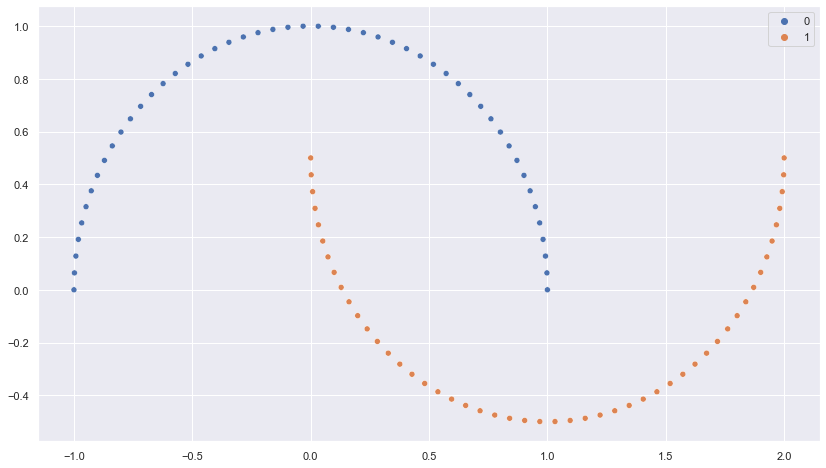

In [4]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

linkage='ward'

In [6]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(linkage='ward', compute_distances=True)

In [7]:
%%time
clustering.fit(X)

Wall time: 4 ms


AgglomerativeClustering(compute_distances=True)

<AxesSubplot:>

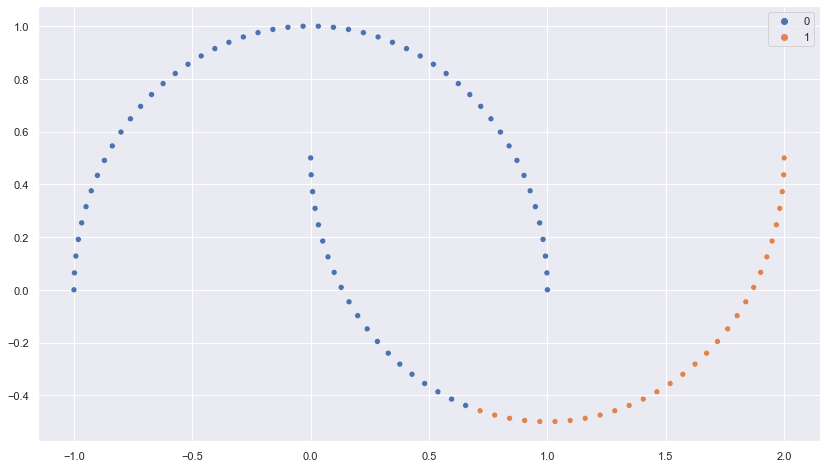

In [8]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)

In [9]:
scoring(clustering, y, X)

Number of clusters: 2 Estimated number of clusters: 2
Homogenity: 0.3958156020033588
Completeness: 0.44913161176278943
V measure: 0.4207914918051407


In [11]:
matrix = metrics.pairwise_distances(clustering.distances_)

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.06410316  0.06410316  0.06410316  0.06410316  0.06410316  0.06410316
  0.06410316  0.06410316  0.06410316  0.06410316  0.06410316  0.06410316
  0.06410316  0.06410316  0.06410316  0.06410316  0.06410316  0.06410316
  0.06410316  0.06410316  0.06410316  0.06410316  0.06410316  0.06410316
  0.06410316  0.06410316  0.06410316  0.06410316  0.06410316  0.06410316
  0.06410316  0.06410316  0.06410316  0.06410316  0.06410316  0.06410316
  0.06410316  0.06410316  0.06410316  0.06410316  0.06410316  0.06410316
  0.06410316  0.06410316  0.11097922  0.11097922  0.11097922  0.11097922
  0.11097922  0.11097922  0.11097922  0.11097922  0.11097922  0.11097922
  0.11097922  0.11097922  0.18112484  0.18112484  0.18112484  0.18112484
  0.18112484  0.18112484  0.18112484  0.18112484  0.18112484  0.18112484
  0.24781718  0.24781718  0.24781718  0.24781718  0.24781718  0.24781718
  0.24781718  0.24781718  0.31314455  0.31314455  0.3321779   0.37768293
  0.41382549  0.44164022  0.49393814  0.51019543  0.51019543  0.60411882
  0.60411882  0.60411882  0.81517868  0.91775304  1.01884559  1.15570273
  1.54744845  1.54744845  1.9492508   1.97769695  3.24120227  3.41455398
  3.51557082  6.46721839 10.17745285].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

linkage='complete'

In [ ]:
clustering = AgglomerativeClustering(linkage='complete')

In [ ]:
%%time
clustering.fit(X)

Wall time: 2 ms


AgglomerativeClustering(linkage='complete')

<AxesSubplot:>

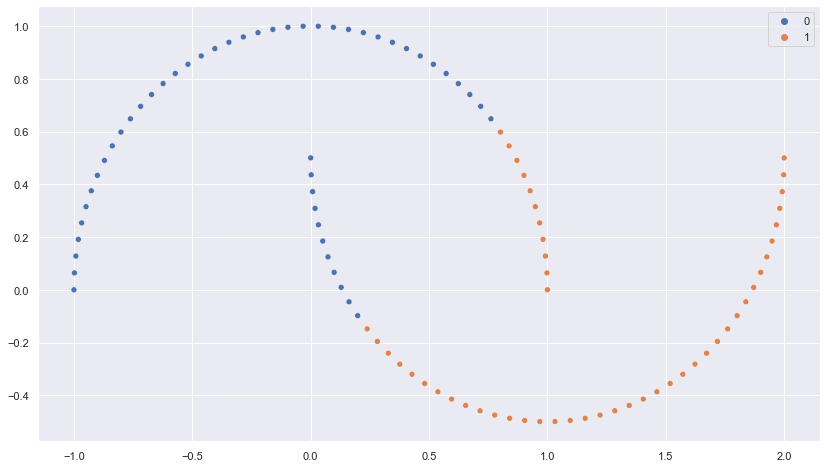

In [ ]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)

In [ ]:
scoring(clustering, y, X)

Number of clusters: 2 Estimated number of clusters: 2
Homogenity: 0.23983249703803494
Completeness: 0.23983249703803494
V measure: 0.23983249703803494


linkage='average'

In [ ]:
clustering = AgglomerativeClustering(linkage='average')

In [ ]:
%%time
clustering.fit(X)

Wall time: 994 µs


AgglomerativeClustering(linkage='average')

<AxesSubplot:>

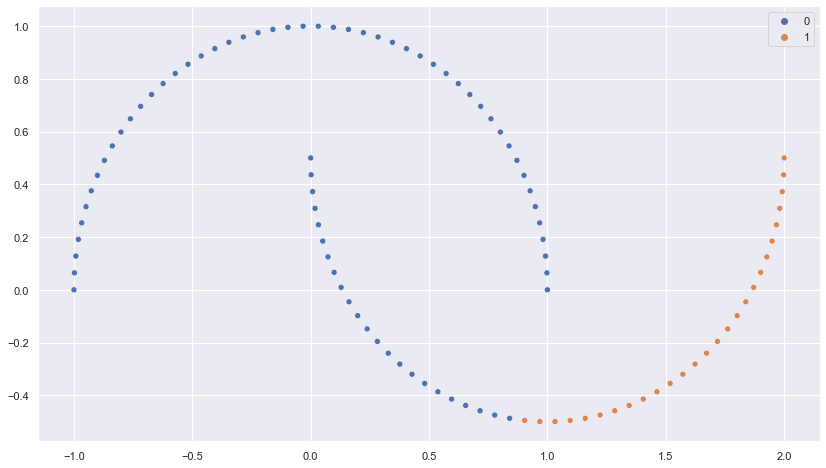

In [ ]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)

In [ ]:
scoring(clustering, y, X)

Number of clusters: 2 Estimated number of clusters: 2
Homogenity: 0.3437754167980627
Completeness: 0.40854410512982475
V measure: 0.3733717281760487


linkage='single'

In [ ]:
clustering = AgglomerativeClustering(linkage='single')

In [ ]:
%%time
clustering.fit(X)

Wall time: 2 ms


AgglomerativeClustering(linkage='single')

<AxesSubplot:>

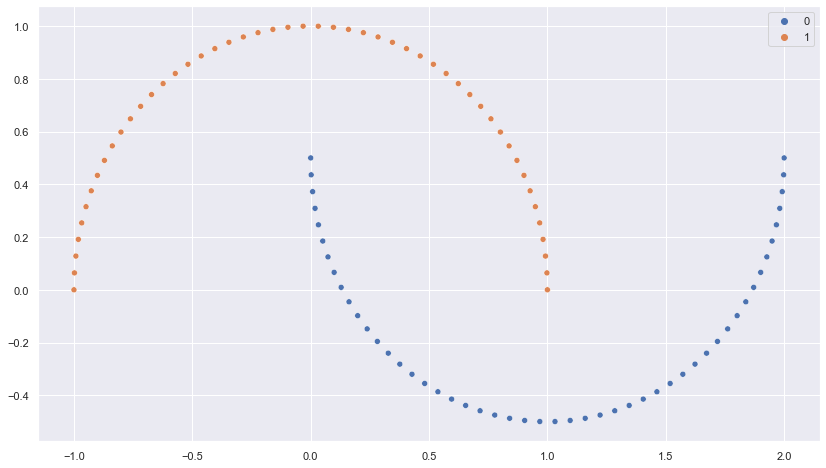

In [ ]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)

In [ ]:
scoring(clustering, y, X)

Number of clusters: 2 Estimated number of clusters: 2
Homogenity: 1.0
Completeness: 1.0
V measure: 1.0


Вилучення об'єктів:

In [ ]:
np.random.seed(17)
random_index = np.random.randint(0, 99, 10)
X = np.delete(X, random_index, axis=0)
y = np.delete(y, random_index, axis=0)

Для перевірки будемо використовувати linkage='single', оскільки вона показала себе найкраще

In [ ]:
clustering = AgglomerativeClustering(linkage='single')

In [ ]:
%%time
clustering.fit(X)

Wall time: 2 ms


AgglomerativeClustering(linkage='single')

<AxesSubplot:>

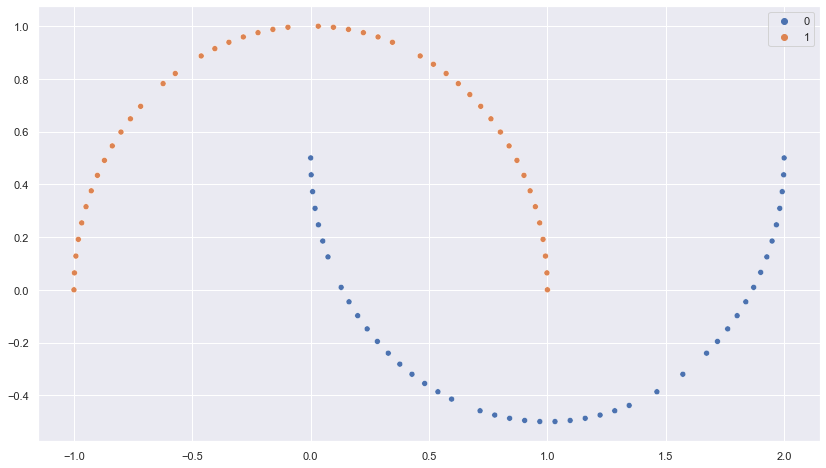

In [ ]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)

In [ ]:
scoring(clustering, y, X)

Number of clusters: 2 Estimated number of clusters: 2
Homogenity: 1.0
Completeness: 1.0
V measure: 1.0


In [ ]:
matrix = metrics.pairwise_distances(clustering.distances_)
matrix

AttributeError: 'AgglomerativeClustering' object has no attribute 'distances_'

In [ ]:
np.shape(clustering.distances_)

(90,)

Висновки <br>
Даний алгоритм гарно себе показав на виборці і ми отримали метрики якості рівні одиниці, вилучення об'єктів не змінило значення метрик, що означає, що алгоритм стійкий